In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler ## standrard scalig 
from sklearn.metrics import f1_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [83]:
import warnings
warnings.filterwarnings("ignore")

In [84]:
df1 = pd.read_parquet('train.parquet')
df1

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [85]:
df1.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

Checking for duplicates

In [86]:
df1.duplicated().sum()


35571

In [87]:
df1.drop_duplicates(inplace=True)

In [88]:
df1.duplicated().sum()

0

In [89]:
from datetime import datetime, timedelta
df1['Date'] = pd.to_datetime(df1['Date']) 

In [90]:
df1.Date.dtype

dtype('<M8[ns]')

**Encoding**

In [91]:
df1['Target_Drug_Taken'] = df1['Incident'].apply(lambda x: 1 if x == 'TARGET DRUG' else 0)

print(df1)

                                   Patient-Uid       Date           Incident  \
0         a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2019-03-09  PRIMARY_DIAGNOSIS   
1         a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f 2015-05-16  PRIMARY_DIAGNOSIS   
3         a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f 2018-01-30     SYMPTOM_TYPE_0   
4         a0dc950b-1c7c-11ec-b6ec-16262ee38c7f 2015-04-22        DRUG_TYPE_0   
8         a0dc9543-1c7c-11ec-bb63-16262ee38c7f 2016-06-18        DRUG_TYPE_1   
...                                        ...        ...                ...   
29080886  a0ee9f75-1c7c-11ec-94c7-16262ee38c7f 2018-07-06        DRUG_TYPE_6   
29080897  a0ee1284-1c7c-11ec-a3d5-16262ee38c7f 2017-12-29        DRUG_TYPE_6   
29080900  a0ee9b26-1c7c-11ec-8a40-16262ee38c7f 2018-10-18       DRUG_TYPE_10   
29080903  a0ee1a92-1c7c-11ec-8341-16262ee38c7f 2015-09-18        DRUG_TYPE_6   
29080911  a0ee146e-1c7c-11ec-baee-16262ee38c7f 2018-10-05        DRUG_TYPE_1   

          Target_Drug_Taken  
0        

In [92]:
df1.Incident.unique()

array(['PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0', 'DRUG_TYPE_0',
       'DRUG_TYPE_1', 'DRUG_TYPE_2', 'TEST_TYPE_0', 'DRUG_TYPE_3',
       'DRUG_TYPE_4', 'DRUG_TYPE_5', 'DRUG_TYPE_6', 'DRUG_TYPE_8',
       'DRUG_TYPE_7', 'SYMPTOM_TYPE_1', 'DRUG_TYPE_10', 'SYMPTOM_TYPE_29',
       'SYMPTOM_TYPE_2', 'DRUG_TYPE_11', 'DRUG_TYPE_9', 'DRUG_TYPE_13',
       'SYMPTOM_TYPE_5', 'TEST_TYPE_1', 'SYMPTOM_TYPE_6', 'TEST_TYPE_2',
       'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_8', 'DRUG_TYPE_14', 'DRUG_TYPE_12',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_7',
       'SYMPTOM_TYPE_11', 'TEST_TYPE_3', 'DRUG_TYPE_15', 'SYMPTOM_TYPE_4',
       'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_16',
       'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_21',
       'DRUG_TYPE_17', 'SYMPTOM_TYPE_22', 'TEST_TYPE_4',
       'SYMPTOM_TYPE_23', 'DRUG_TYPE_16', 'TEST_TYPE_5',
       'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25',
   

In [93]:
incident_counts = df1['Target_Drug_Taken'].value_counts()
print(incident_counts)

0    3118079
1      67218
Name: Target_Drug_Taken, dtype: int64


In [94]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df1['Patient-Uid'] = encoder.fit_transform(df1['Patient-Uid'])
#df1['Incident'] = encoder.fit_transform(df1['Incident'])

In [95]:
df1=pd.get_dummies(df1,columns=["Incident"])

In [96]:
df1.head()

,Patient-Uid,Date,Target_Drug_Taken,Incident_DRUG_TYPE_0,Incident_DRUG_TYPE_1,Incident_DRUG_TYPE_10,Incident_DRUG_TYPE_11,Incident_DRUG_TYPE_12,Incident_DRUG_TYPE_13,Incident_DRUG_TYPE_14,...,Incident_SYMPTOM_TYPE_7,Incident_SYMPTOM_TYPE_8,Incident_SYMPTOM_TYPE_9,Incident_TARGET DRUG,Incident_TEST_TYPE_0,Incident_TEST_TYPE_1,Incident_TEST_TYPE_2,Incident_TEST_TYPE_3,Incident_TEST_TYPE_4,Incident_TEST_TYPE_5
0,0,2019-03-09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2015-05-16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2018-01-30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2015-04-22,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,2016-06-18,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
df1.sort_values(['Patient-Uid', 'Date'], ascending=True,inplace=True)

In [98]:
Target_Drug_Taken = 1  # Change to your desired tablet

In [99]:
# Function to calculate the last occurrence date for a given person and tablet
def calculate_last_occurrence_date(group):
    group['LastOccurrenceDate'] = pd.NaT
    for index, row in group.iterrows():
        if row['Target_Drug_Taken'] == 1:
            group.at[index, 'LastOccurrenceDate'] = row['Date']
    group['LastOccurrenceDate'].fillna(method='ffill', inplace=True)
    group['DaysSinceLastOccurrence'] = (group['Date'] - group['LastOccurrenceDate']).dt.days
    return group

# Apply the function to each group of persons
df1 = df1.groupby('Patient-Uid').apply(calculate_last_occurrence_date)

# Print the updated DataFrame
df1.head()

,Patient-Uid,Date,Target_Drug_Taken,Incident_DRUG_TYPE_0,Incident_DRUG_TYPE_1,Incident_DRUG_TYPE_10,Incident_DRUG_TYPE_11,Incident_DRUG_TYPE_12,Incident_DRUG_TYPE_13,Incident_DRUG_TYPE_14,...,Incident_SYMPTOM_TYPE_9,Incident_TARGET DRUG,Incident_TEST_TYPE_0,Incident_TEST_TYPE_1,Incident_TEST_TYPE_2,Incident_TEST_TYPE_3,Incident_TEST_TYPE_4,Incident_TEST_TYPE_5,LastOccurrenceDate,DaysSinceLastOccurrence
1750087,0,2015-09-22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaT,NaN
1473893,0,2018-04-13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaT,NaN
1387922,0,2018-05-02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaT,NaN
223191,0,2018-11-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaT,NaN
557302,0,2018-11-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaT,NaN


In [100]:
df1.head()

,Patient-Uid,Date,Target_Drug_Taken,Incident_DRUG_TYPE_0,Incident_DRUG_TYPE_1,Incident_DRUG_TYPE_10,Incident_DRUG_TYPE_11,Incident_DRUG_TYPE_12,Incident_DRUG_TYPE_13,Incident_DRUG_TYPE_14,...,Incident_SYMPTOM_TYPE_9,Incident_TARGET DRUG,Incident_TEST_TYPE_0,Incident_TEST_TYPE_1,Incident_TEST_TYPE_2,Incident_TEST_TYPE_3,Incident_TEST_TYPE_4,Incident_TEST_TYPE_5,LastOccurrenceDate,DaysSinceLastOccurrence
1750087,0,2015-09-22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaT,NaN
1473893,0,2018-04-13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaT,NaN
1387922,0,2018-05-02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaT,NaN
223191,0,2018-11-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaT,NaN
557302,0,2018-11-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaT,NaN


In [101]:
df1.sort_values(['Patient-Uid', 'Date'], ascending=True,inplace=True)

In [102]:
df1.head()

,Patient-Uid,Date,Target_Drug_Taken,Incident_DRUG_TYPE_0,Incident_DRUG_TYPE_1,Incident_DRUG_TYPE_10,Incident_DRUG_TYPE_11,Incident_DRUG_TYPE_12,Incident_DRUG_TYPE_13,Incident_DRUG_TYPE_14,...,Incident_SYMPTOM_TYPE_9,Incident_TARGET DRUG,Incident_TEST_TYPE_0,Incident_TEST_TYPE_1,Incident_TEST_TYPE_2,Incident_TEST_TYPE_3,Incident_TEST_TYPE_4,Incident_TEST_TYPE_5,LastOccurrenceDate,DaysSinceLastOccurrence
1750087,0,2015-09-22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaT,NaN
1473893,0,2018-04-13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaT,NaN
1387922,0,2018-05-02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaT,NaN
223191,0,2018-11-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaT,NaN
557302,0,2018-11-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaT,NaN


In [103]:
grouped = df1.groupby('Patient-Uid')

# Create a new column 'Eligible_within_30days' and initialize with False
df1['Eligible_within_30days'] = False

# Iterate over each group
for name, group in grouped:
    person_filter = group['Target_Drug_Taken'] == 1
    if person_filter.sum() > 0:
        # If person has already taken 'paracetamol' once, set Eligible_within_30days to True from that date onwards
        first_occurrence_date = group.loc[person_filter, 'Date'].min()
        df1.loc[(df1['Patient-Uid'] == name) & (df1['Date'] >= first_occurrence_date), 'Eligible_within_30days'] = True
    else:
        # If person hasn't taken 'paracetamol' before, check if they take it within the next two days
        next_30_days = pd.date_range(start=group['Date'].max(), periods=30)
        eligible_filter = group['Date'].isin(next_30_days)
        df1.loc[df1['Patient-Uid'] == name, 'Eligible_within_30days'] = eligible_filter

# Sort the DataFrame by 'Person' and 'Date'
df1.sort_values(['Patient-Uid', 'Date'], inplace=True)

In [104]:
df1.head()

,Patient-Uid,Date,Target_Drug_Taken,Incident_DRUG_TYPE_0,Incident_DRUG_TYPE_1,Incident_DRUG_TYPE_10,Incident_DRUG_TYPE_11,Incident_DRUG_TYPE_12,Incident_DRUG_TYPE_13,Incident_DRUG_TYPE_14,...,Incident_TARGET DRUG,Incident_TEST_TYPE_0,Incident_TEST_TYPE_1,Incident_TEST_TYPE_2,Incident_TEST_TYPE_3,Incident_TEST_TYPE_4,Incident_TEST_TYPE_5,LastOccurrenceDate,DaysSinceLastOccurrence,Eligible_within_30days
1750087,0,2015-09-22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaT,NaN,False
1473893,0,2018-04-13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaT,NaN,False
1387922,0,2018-05-02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaT,NaN,False
223191,0,2018-11-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaT,NaN,False
557302,0,2018-11-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaT,NaN,False


In [105]:
df1['Eligible_within_30days']=df1['Eligible_within_30days'].map({False:0,True:1})

In [106]:
df1.head()

,Patient-Uid,Date,Target_Drug_Taken,Incident_DRUG_TYPE_0,Incident_DRUG_TYPE_1,Incident_DRUG_TYPE_10,Incident_DRUG_TYPE_11,Incident_DRUG_TYPE_12,Incident_DRUG_TYPE_13,Incident_DRUG_TYPE_14,...,Incident_TARGET DRUG,Incident_TEST_TYPE_0,Incident_TEST_TYPE_1,Incident_TEST_TYPE_2,Incident_TEST_TYPE_3,Incident_TEST_TYPE_4,Incident_TEST_TYPE_5,LastOccurrenceDate,DaysSinceLastOccurrence,Eligible_within_30days
1750087,0,2015-09-22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaT,NaN,0
1473893,0,2018-04-13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaT,NaN,0
1387922,0,2018-05-02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaT,NaN,0
223191,0,2018-11-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaT,NaN,0
557302,0,2018-11-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaT,NaN,0


In [107]:
df1.fillna(-999, inplace=True)

In [108]:
df1.head()

,Patient-Uid,Date,Target_Drug_Taken,Incident_DRUG_TYPE_0,Incident_DRUG_TYPE_1,Incident_DRUG_TYPE_10,Incident_DRUG_TYPE_11,Incident_DRUG_TYPE_12,Incident_DRUG_TYPE_13,Incident_DRUG_TYPE_14,...,Incident_TARGET DRUG,Incident_TEST_TYPE_0,Incident_TEST_TYPE_1,Incident_TEST_TYPE_2,Incident_TEST_TYPE_3,Incident_TEST_TYPE_4,Incident_TEST_TYPE_5,LastOccurrenceDate,DaysSinceLastOccurrence,Eligible_within_30days
1750087,0,2015-09-22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-999,-999.0,0
1473893,0,2018-04-13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-999,-999.0,0
1387922,0,2018-05-02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-999,-999.0,0
223191,0,2018-11-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-999,-999.0,0
557302,0,2018-11-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-999,-999.0,0


In [109]:
df1['dayofweek'] = df1.Date.dt.dayofweek
df1['quarter'] = df1.Date.dt.quarter
df1['month'] = df1.Date.dt.month
df1['year'] = df1.Date.dt.year
df1['dayofyear'] = df1.Date.dt.dayofyear
df1['dayofmonth'] = df1.Date.dt.day
df1['weekofyear'] = df1.Date.dt.isocalendar().week 

In [110]:
df1.Eligible_within_30days.unique()

array([0, 1], dtype=int64)

In [111]:
oldest_date = df1['Date'].min()
latest_date = df1['Date'].max()
print(oldest_date, latest_date)

2015-04-07 00:00:00 2020-09-03 00:00:00


In [112]:
df1.dtypes

Patient-Uid                      int32
Date                    datetime64[ns]
Target_Drug_Taken                int64
Incident_DRUG_TYPE_0             uint8
Incident_DRUG_TYPE_1             uint8
                             ...      
month                            int64
year                             int64
dayofyear                        int64
dayofmonth                       int64
weekofyear                      UInt32
Length: 70, dtype: object

In [113]:
df1['weekofyear']=df1['weekofyear'].astype("int64")  #We have to change datatype of weekofyear
df1['weekofyear'].dtype

dtype('int64')

In [114]:
ff1=df1.copy()

In [115]:
df1['Patient-Uid'].unique()

array([    0,     1,     2, ..., 27030, 27031, 27032])

In [116]:
train = df1.loc[df1['Patient-Uid'] < 20000]
test = df1.loc[df1['Patient-Uid'] >= 20000]

In [117]:
train.drop(columns=['Date','LastOccurrenceDate','Patient-Uid','DaysSinceLastOccurrence'], inplace=True)
test.drop(columns=['Date','LastOccurrenceDate','Patient-Uid','DaysSinceLastOccurrence'], inplace=True)

X_train = train.drop(columns=['Eligible_within_30days'])
y_train = train['Eligible_within_30days']

X_test = train.drop(columns=['Eligible_within_30days'])
y_test = train['Eligible_within_30days']
print(train.shape)
print(test.shape)

(2160984, 66)
(1024313, 66)


In [118]:
#df1.loc[df1.LastOccurrenceDate.apply(lambda x: type(x)==pd._libs.tslibs.timestamps.Timestamp)]['LastOccurrenceDate']
#df1['LastOccurrenceDate'] = pd.to_datetime(df1.loc[df1.LastOccurrenceDate.apply(lambda x: type(x)==pd._libs.tslibs.timestamps.Timestamp)]['LastOccurrenceDate']) 

In [119]:
X_train.dtypes

Target_Drug_Taken        int64
Incident_DRUG_TYPE_0     uint8
Incident_DRUG_TYPE_1     uint8
Incident_DRUG_TYPE_10    uint8
Incident_DRUG_TYPE_11    uint8
                         ...  
month                    int64
year                     int64
dayofyear                int64
dayofmonth               int64
weekofyear               int64
Length: 65, dtype: object

In [120]:
model = XGBClassifier(n_estimators=100)
model.fit(X_train,y_train) #train the model
model.score(X_test, y_test)

0.9396848842934515

In [121]:
y_pred = model.predict(X_test)
f1_score(y_test, y_pred)

0.34342823752241625

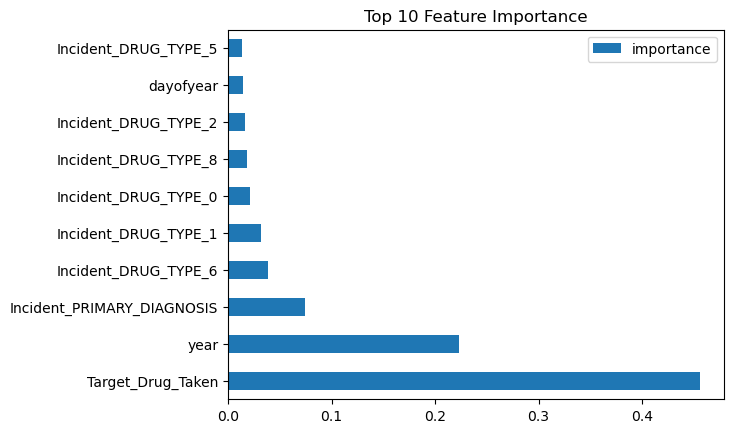

In [133]:
fi = pd.DataFrame(data=model.feature_importances_,
                  index=model.feature_names_in_,
                  columns=['importance'])
top_10_features = fi.sort_values('importance', ascending=False).head(10)
top_10_features.plot(kind='barh', title='Top 10 Feature Importance')
plt.show()

### Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators= 100, max_depth = 2, max_features='sqrt')
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
f1_score(y_test, y_pred)

0.0

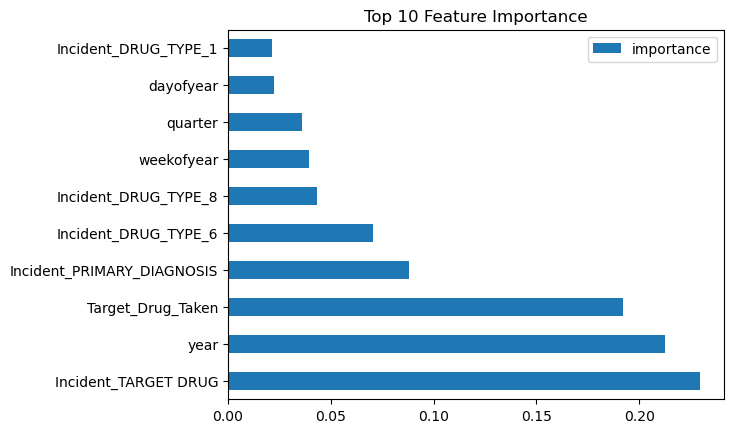

In [131]:
fi = pd.DataFrame(data=rf.feature_importances_,
                  index=rf.feature_names_in_,
                  columns=['importance'])
top_10_features = fi.sort_values('importance', ascending=False).head(10)
top_10_features.plot(kind='barh', title='Top 10 Feature Importance')
plt.show()

### Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train ,y_train) 
y_pred = dt.predict(X_test)
f1_score(y_test, y_pred)

0.3630107697968357

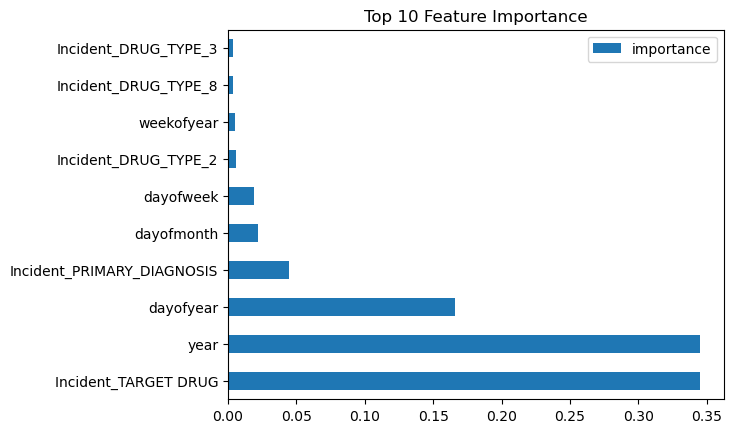

In [132]:
fi = pd.DataFrame(data=dt.feature_importances_,
                  index=dt.feature_names_in_,
                  columns=['importance'])
top_10_features = fi.sort_values('importance', ascending=False).head(10)
top_10_features.plot(kind='barh', title='Top 10 Feature Importance')
plt.show()
